# this is an EDA file:
- filters the six MBTA csvs and combines all ruggles-to-downtown crossing durations from the dataset into a single csv
- gets 15-minute interval weather data
- combines the two dataframes

In [92]:
import matplotlib.pyplot as plt

In [94]:
%run .\import.ipynb

# Import common funcs/libs for DS4420

# imports
import os
import numpy as np
import pandas as pd

# funcs / constants
SOURCE_FOLDER = ''
listAssets(suffix=False)



In [134]:
SOURCE_FOLDER = "project"

In [136]:
listAssets()

['C:\\Users\\Overl\\DS4420\\assets\\project\\2025-01_HRTravelTimes.csv',
 'C:\\Users\\Overl\\DS4420\\assets\\project\\2025-01_LRTravelTimes.csv',
 'C:\\Users\\Overl\\DS4420\\assets\\project\\2025-02_HRTravelTimes.csv',
 'C:\\Users\\Overl\\DS4420\\assets\\project\\2025-02_LRTravelTimes.csv',
 'C:\\Users\\Overl\\DS4420\\assets\\project\\2025-03_HRTravelTimes.csv',
 'C:\\Users\\Overl\\DS4420\\assets\\project\\2025-03_LRTravelTimes.csv']

# filter all MBTA travel data down to just the route between dtxg and ruggles

In [155]:
def get_save_name(filenum):
    return f"ruggles2dtxg_{filenum}.csv"

In [157]:
def loadroute(filenum = 0,
              fstop   = "Ruggles",
              tstop   = "Downtown Crossing",
              to_save = True 
             ):
    print("reading file",listAssets()[filenum])
    ht1 = pd.read_csv(listAssets()[filenum],low_memory=False)
    ht1 = ht1[ht1["from_stop_name"] == f"{fstop}"]
    ht1 = ht1[ht1["to_stop_name"]   == f"{tstop}"]
    print(f"file read {filenum} complete!")

    # process the smaller file
    rtd_secs = ht1.loc[:,["from_stop_departure_datetime","travel_time_sec"]]
    rtd_secs.rename(columns={'from_stop_departure_datetime': 'from_time'}, inplace=True)
    if to_save:
        print("saving file: ",save_filename)
        rtd_secs.to_csv(get_save_name(i),index=False)
        print("save complete!")
    return rtd_secs

In [59]:
# save all files
for i in range(len(listAssets())):
    loadroute(i,to_save=True)

reading file C:\Users\Overl\DS4420\assets\project\2025-01_HRTravelTimes.csv
file read 0 complete!
saving file:  ruggles2dtxg_0.csv
save complete!
reading file C:\Users\Overl\DS4420\assets\project\2025-01_LRTravelTimes.csv
file read 1 complete!
saving file:  ruggles2dtxg_1.csv
save complete!
reading file C:\Users\Overl\DS4420\assets\project\2025-02_HRTravelTimes.csv
file read 2 complete!
saving file:  ruggles2dtxg_2.csv
save complete!
reading file C:\Users\Overl\DS4420\assets\project\2025-02_LRTravelTimes.csv
file read 3 complete!
saving file:  ruggles2dtxg_3.csv
save complete!
reading file C:\Users\Overl\DS4420\assets\project\2025-03_HRTravelTimes.csv
file read 4 complete!
saving file:  ruggles2dtxg_4.csv
save complete!
reading file C:\Users\Overl\DS4420\assets\project\2025-03_LRTravelTimes.csv
file read 5 complete!
saving file:  ruggles2dtxg_5.csv
save complete!


#### sanity check

In [161]:
rtd_secs = pd.read_csv("ruggles2dtxg_4.csv")

In [163]:
np.min(rtd_secs["travel_time_sec"])

337

In [165]:
np.max(rtd_secs["travel_time_sec"])

1256

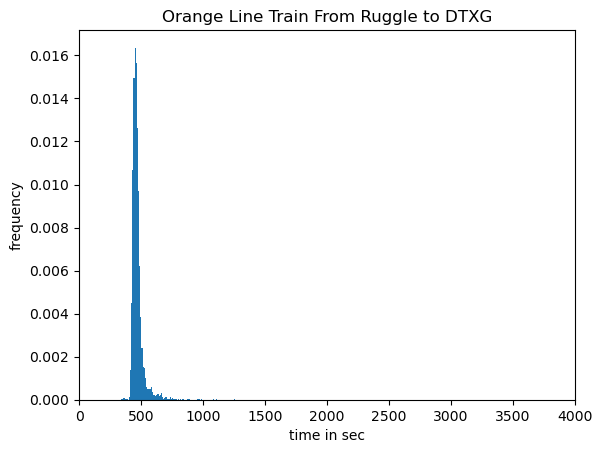

In [167]:
plt.hist(rtd_secs["travel_time_sec"],bins=100,density=True)
plt.xlabel("time in sec")
plt.ylabel("frequency")
plt.xlim(0,4000)
plt.title("Orange Line Train From Ruggle to DTXG")
plt.show()

In [169]:
pd.read_csv("ruggles2dtxg_0.csv")

,from_time,travel_time_sec
0,2025-01-01T07:37:13Z,437
1,2025-01-01T09:05:05Z,628
2,2025-01-01T10:37:03Z,550
3,2025-01-01T12:03:11Z,478
4,2025-01-01T13:34:17Z,512
...,...,...
4651,2025-01-31T23:49:38Z,464
4652,2025-02-01T00:01:17Z,458
4653,2025-02-01T00:14:57Z,501
4654,2025-02-01T00:28:43Z,470


In [ ]:
pd.read_csv("ruggles2dtxg_1.csv")

In [81]:
pd.read_csv("ruggles2dtxg_2.csv")

,from_time,travel_time_sec
0,2025-02-01T05:38:01Z,461
1,2025-02-01T06:10:01Z,642
2,2025-02-01T05:26:29Z,458
3,2025-02-01T05:48:42Z,433
4,2025-02-01T06:21:48Z,450
...,...,...
4265,2025-02-28T13:34:58Z,484
4266,2025-02-28T13:55:13Z,451
4267,2025-02-28T14:13:48Z,718
4268,2025-02-28T15:39:09Z,473


In [ ]:
pd.read_csv("ruggles2dtxg_3.csv")

In [77]:
pd.read_csv("ruggles2dtxg_4.csv")

,from_time,travel_time_sec
0,2025-03-03T06:08:49Z,469
1,2025-03-03T07:39:08Z,481
2,2025-03-03T09:12:34Z,659
3,2025-03-03T06:11:18Z,446
4,2025-03-03T07:42:45Z,671
...,...,...
4632,2025-03-31T09:56:19Z,443
4633,2025-03-31T10:00:58Z,427
4634,2025-03-31T10:13:34Z,458
4635,2025-03-31T10:19:04Z,445


In [89]:
pd.read_csv("ruggles2dtxg_5.csv")

,from_time,travel_time_sec


In [87]:
4656 + 4270 + 4637

13563

In [123]:
def combine_csvs():
    csv_list = []
    for i in range(len(listAssets())):
        csv_list.append(pd.read_csv(get_save_name(i)))

    return pd.concat(csv_list, ignore_index=True)

In [185]:
all_ruggles_data = combine_csvs()
assert all_ruggles_data.shape[0] == (4656 + 4270 + 4637)
all_ruggles_data.to_csv("ruggles2dtxg_all.csv",index=False)
all_ruggles_data

,from_time,travel_time_sec
0,2025-01-01T07:37:13Z,437
1,2025-01-01T09:05:05Z,628
2,2025-01-01T10:37:03Z,550
3,2025-01-01T12:03:11Z,478
4,2025-01-01T13:34:17Z,512
...,...,...
13558,2025-03-31T09:56:19Z,443
13559,2025-03-31T10:00:58Z,427
13560,2025-03-31T10:13:34Z,458
13561,2025-03-31T10:19:04Z,445


# pre-process all ruggles data to join with weather

In [190]:
# read and process on 15 min intervals
all_ruggles_data = pd.read_csv("ruggles2dtxg_all.csv")
all_ruggles_data["from_time"] = pd.to_datetime(all_ruggles_data["from_time"]).dt.tz_localize(None)
all_ruggles_data["15min"] = all_ruggles_data['from_time'].dt.round('15min')
all_ruggles_data

,from_time,travel_time_sec,15min
0,2025-01-01 07:37:13,437,2025-01-01 07:30:00
1,2025-01-01 09:05:05,628,2025-01-01 09:00:00
2,2025-01-01 10:37:03,550,2025-01-01 10:30:00
3,2025-01-01 12:03:11,478,2025-01-01 12:00:00
4,2025-01-01 13:34:17,512,2025-01-01 13:30:00
...,...,...,...
13558,2025-03-31 09:56:19,443,2025-03-31 10:00:00
13559,2025-03-31 10:00:58,427,2025-03-31 10:00:00
13560,2025-03-31 10:13:34,458,2025-03-31 10:15:00
13561,2025-03-31 10:19:04,445,2025-03-31 10:15:00


# import weather

In [192]:
# preproc 15-min weather
weather = pd.read_csv("boston-15min.csv")
weather["time"] = pd.to_datetime(weather["time"])
weather = weather.fillna(0)
weather

,time,temperature_2m (°C),precipitation (mm),relative_humidity_2m (%),visibility (m),wind_speed_10m (km/h),weather_code (wmo code),rain (mm),snowfall_height (m),snowfall (cm),dew_point_2m (°C),lightning_potential (J/kg)
0,2025-01-01 00:00:00,4.7,0.0,75,20100,4.6,3,0.0,0.0,0.0,0.7,0.0
1,2025-01-01 00:15:00,4.7,0.0,75,20300,7.5,3,0.0,0.0,0.0,0.7,0.0
2,2025-01-01 00:30:00,4.3,0.0,75,20900,7.3,3,0.0,0.0,0.0,0.3,0.0
3,2025-01-01 00:45:00,3.9,0.0,75,20200,7.8,3,0.0,0.0,0.0,-0.2,0.0
4,2025-01-01 01:00:00,3.5,0.0,76,20000,4.0,3,0.0,0.0,0.0,-0.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8731,2025-04-01 22:45:00,9.2,0.0,26,65300,17.1,0,0.0,0.0,0.0,-9.3,0.0
8732,2025-04-01 23:00:00,8.9,0.0,26,68800,15.8,0,0.0,0.0,0.0,-9.6,0.0
8733,2025-04-01 23:15:00,8.4,0.0,25,67200,13.0,0,0.0,0.0,0.0,-10.5,0.0
8734,2025-04-01 23:30:00,8.1,0.0,25,66400,11.4,0,0.0,0.0,0.0,-10.8,0.0


# merge all ruggles dta with weather

In [196]:
df = pd.merge(all_ruggles_data,weather,left_on="15min",right_on="time")
df.shape

(13563, 15)

In [222]:
df = pd.get_dummies(df,
                    prefix="w_code",
                    columns=["weather_code (wmo code)"])

KeyError: "None of [Index(['weather_code (wmo code)'], dtype='object')] are in the [columns]"

In [236]:
df.columns

Index(['from_time', 'travel_time_sec', '15min', 'time', 'temperature_2m (°C)',
       'precipitation (mm)', 'relative_humidity_2m (%)', 'visibility (m)',
       'wind_speed_10m (km/h)', 'rain (mm)', 'snowfall_height (m)',
       'snowfall (cm)', 'dew_point_2m (°C)', 'lightning_potential (J/kg)',
       'w_code_0', 'w_code_1', 'w_code_2', 'w_code_3', 'w_code_45',
       'w_code_51', 'w_code_53', 'w_code_55', 'w_code_57', 'w_code_61',
       'w_code_63', 'w_code_65', 'w_code_73', 'w_code_75'],
      dtype='object')

In [238]:
import sklearn.preprocessing

In [245]:
def df_scaler(df,cols):
    df = df.copy(deep=True)
    scaler = sklearn.preprocessing.StandardScaler()
    df.loc[:,cols] = scaler.fit_transform(df[cols])
    return df

In [258]:
scaled = df_scaler(df,['temperature_2m (°C)',
       'precipitation (mm)', 'relative_humidity_2m (%)', 'visibility (m)',
       'wind_speed_10m (km/h)', 'rain (mm)', 'snowfall_height (m)',
       'snowfall (cm)', 'dew_point_2m (°C)', 'lightning_potential (J/kg)'])
scaled.to_csv("ruggles2dtxg_weather_scaled.csv",index=False)
scaled

,from_time,travel_time_sec,15min,time,temperature_2m (°C),precipitation (mm),relative_humidity_2m (%),visibility (m),wind_speed_10m (km/h),rain (mm),...,w_code_45,w_code_51,w_code_53,w_code_55,w_code_57,w_code_61,w_code_63,w_code_65,w_code_73,w_code_75
0,2025-01-01 07:37:13,437,2025-01-01 07:30:00,2025-01-01 07:30:00,0.997457,15.318031,1.432484,-1.707322,0.680066,16.184275,...,False,False,False,False,False,False,False,True,False,False
1,2025-01-01 07:24:50,454,2025-01-01 07:30:00,2025-01-01 07:30:00,0.997457,15.318031,1.432484,-1.707322,0.680066,16.184275,...,False,False,False,False,False,False,False,True,False,False
2,2025-01-01 09:05:05,628,2025-01-01 09:00:00,2025-01-01 09:00:00,1.043243,-0.123222,1.666488,-1.106371,0.121651,-0.102631,...,False,False,False,False,False,False,False,False,False,False
3,2025-01-01 08:53:46,478,2025-01-01 09:00:00,2025-01-01 09:00:00,1.043243,-0.123222,1.666488,-1.106371,0.121651,-0.102631,...,False,False,False,False,False,False,False,False,False,False
4,2025-01-01 10:37:03,550,2025-01-01 10:30:00,2025-01-01 10:30:00,1.027981,-0.123222,1.666488,-1.128629,-0.325081,-0.102631,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13558,2025-03-31 09:56:19,443,2025-03-31 10:00:00,2025-03-31 10:00:00,0.676961,-0.123222,1.713289,-1.796351,-1.516366,-0.102631,...,True,False,False,False,False,False,False,False,False,False
13559,2025-03-31 10:00:58,427,2025-03-31 10:00:00,2025-03-31 10:00:00,0.676961,-0.123222,1.713289,-1.796351,-1.516366,-0.102631,...,True,False,False,False,False,False,False,False,False,False
13560,2025-03-31 10:13:34,458,2025-03-31 10:15:00,2025-03-31 10:15:00,0.676961,-0.123222,1.713289,-1.790787,-1.839006,-0.102631,...,True,False,False,False,False,False,False,False,False,False
13561,2025-03-31 10:19:04,445,2025-03-31 10:15:00,2025-03-31 10:15:00,0.676961,-0.123222,1.713289,-1.790787,-1.839006,-0.102631,...,True,False,False,False,False,False,False,False,False,False
